## Analiza danych

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('data/parsed_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             9598 non-null   int64  
 1   length                                 9598 non-null   object 
 2   discount                               9598 non-null   int64  
 3   user_id                                9598 non-null   int64  
 4   successful                             9598 non-null   bool   
 5   mean_price                             9598 non-null   float64
 6   min_rating                             9598 non-null   float64
 7   max_rating                             9598 non-null   float64
 8   mean_rating                            9598 non-null   float64
 9   successful_sessions_so_far             9598 non-null   int64  
 10  sessions_so_far                        9598 non-null   int64  
 11  cat_

In [4]:
num_of_rows = data.shape[0]
successful = data[data.successful == True]
unsuccessful = data[data.successful != True]
num_of_successful = len(successful)
num_of_unsuccessful = len(unsuccessful)

ratio = round(num_of_successful / num_of_unsuccessful, 2)
# stosunek sesji zakończonych zakupem do sesji pustych
ratio

0.3

In [6]:
# procent sesji zakończonych sukcesem
round(num_of_successful / (num_of_successful+num_of_unsuccessful), 2)

0.23

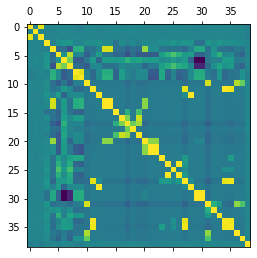

In [7]:
# ten wykres można zrobić dla kilku zestawów kolumn.
plt.matshow(data.corr())
plt.show()